<a href="https://colab.research.google.com/github/manasik29/CLustering_Assignment/blob/main/Clustering_Assignment(crime_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.**

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [ ]:
#Load the dataset
#Print top 10 rows
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('/content/crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [ ]:
df.shape

(50, 5)

In [ ]:
#Rename the 1st column
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# **EDA**

In [ ]:
#check for missing values
df.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

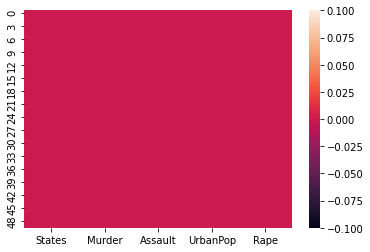

In [ ]:
#to genrate heat map for missing values
import seaborn as sns
cols = df.columns
sns.heatmap(df[cols].isnull())

We can conclude no missing values

In [ ]:
#check for duplicated values
df[df.duplicated()].shape

(0, 5)

In [ ]:
df[df.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


We can concluded there are no duplicated values in data.

In [ ]:
#get descriptive stats for numerical columns
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


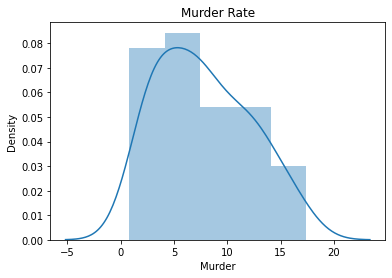

In [ ]:
#plot histograms for every column
#Univariate Analysis
plt.title('Murder Rate')
sns.distplot(df.Murder)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


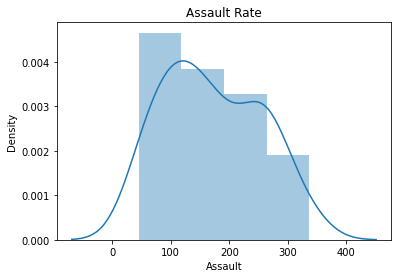

In [ ]:
plt.title('Assault Rate')
sns.distplot(df.Assault)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


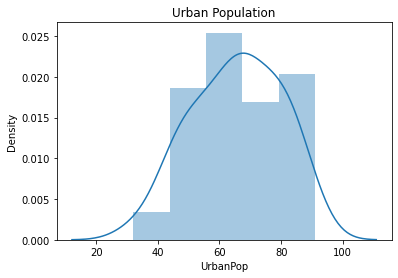

In [ ]:
plt.title('Urban Population')
sns.distplot(df.UrbanPop)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


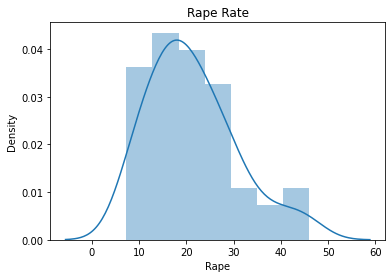

In [ ]:
plt.title('Rape Rate')
sns.distplot(df.Rape)

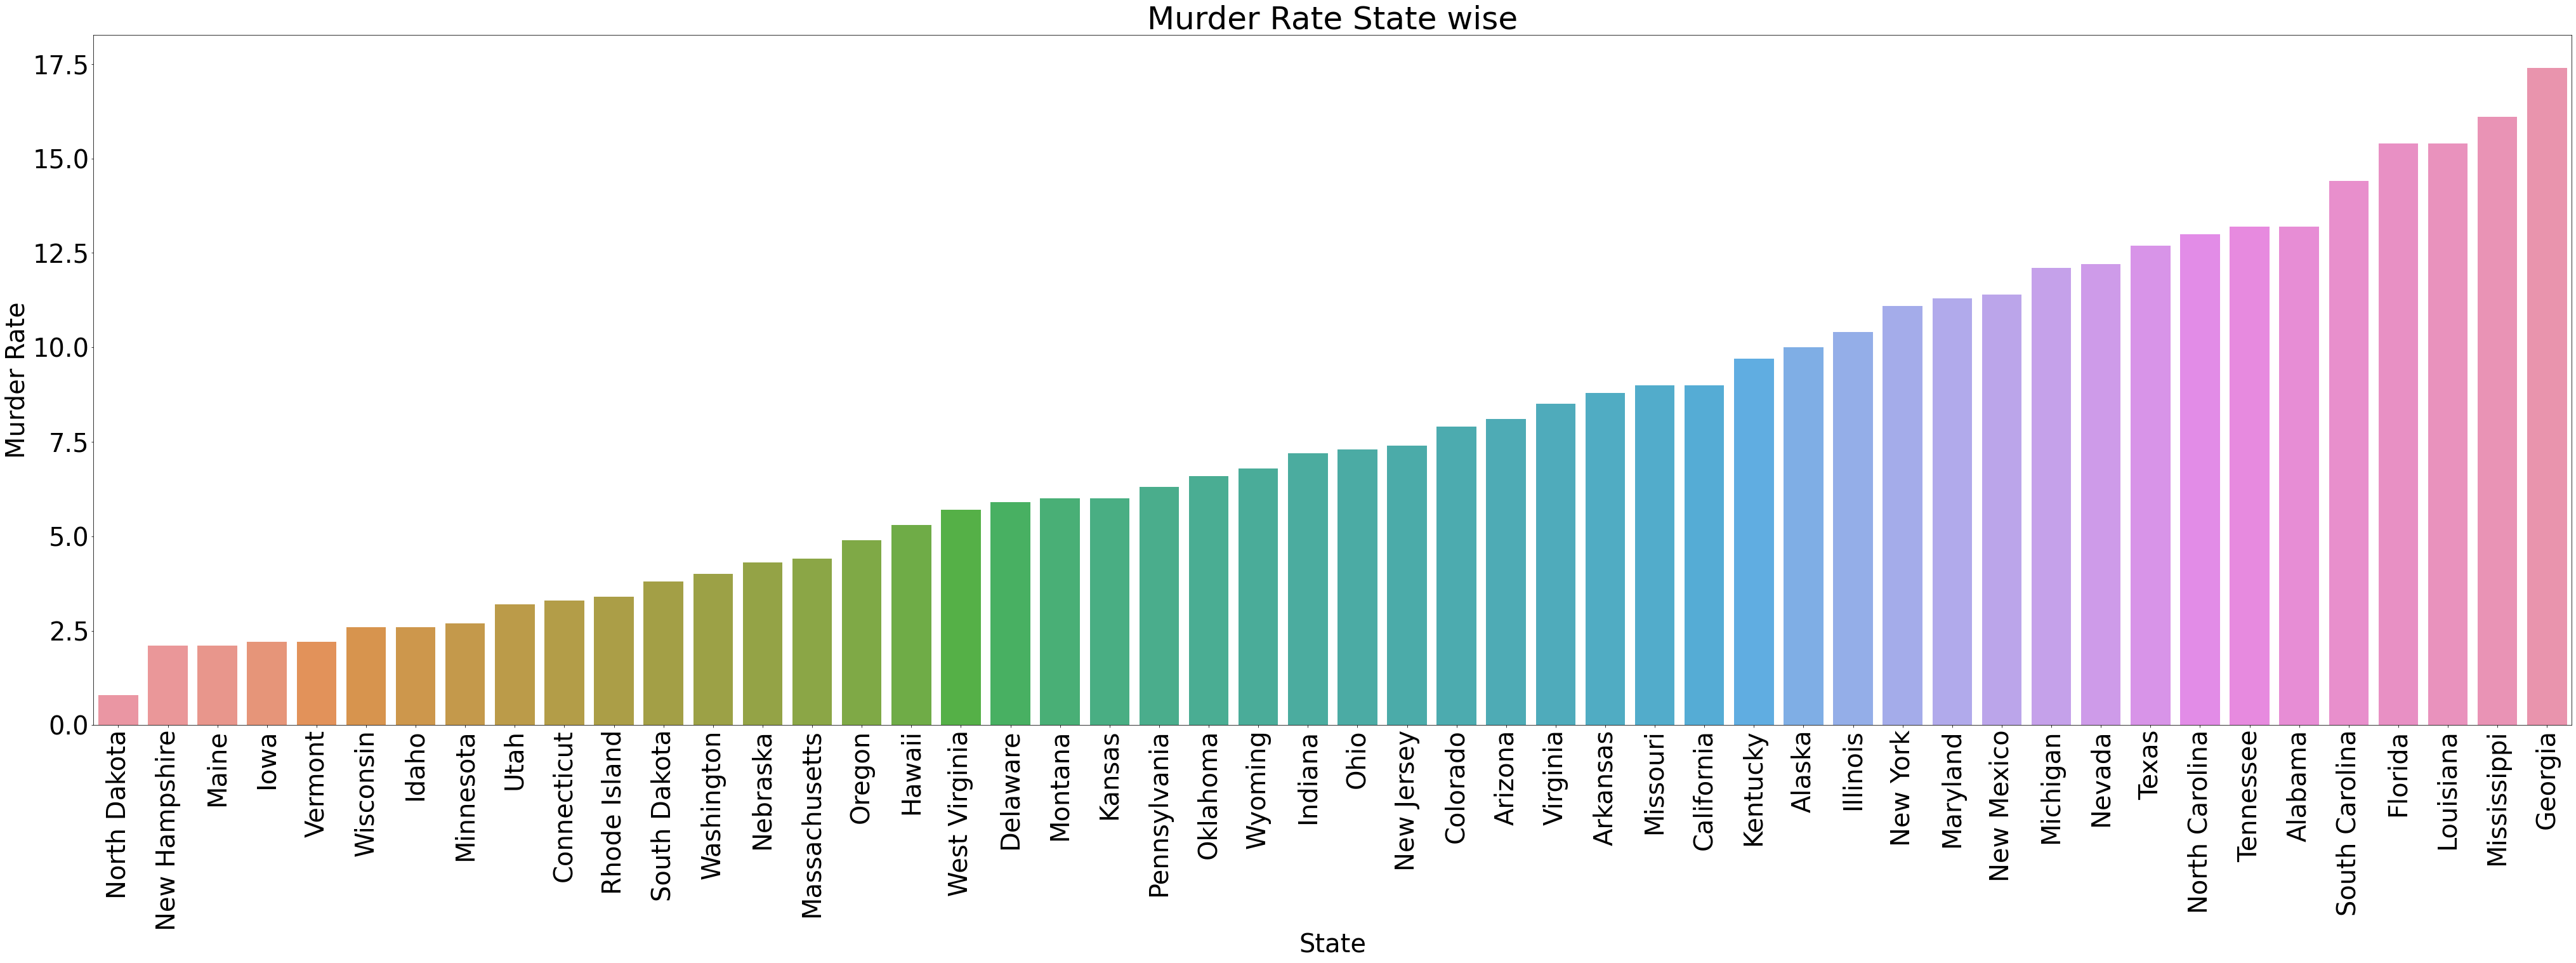

In [ ]:
#Bivariate Analysis
#Crime Rate according to state
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.Murder, order=df.sort_values('Murder').States)
plt.xlabel('State', size=40)
plt.ylabel('Murder Rate', size=40)
plt.title('Murder Rate State wise', size=50)
plt.show()

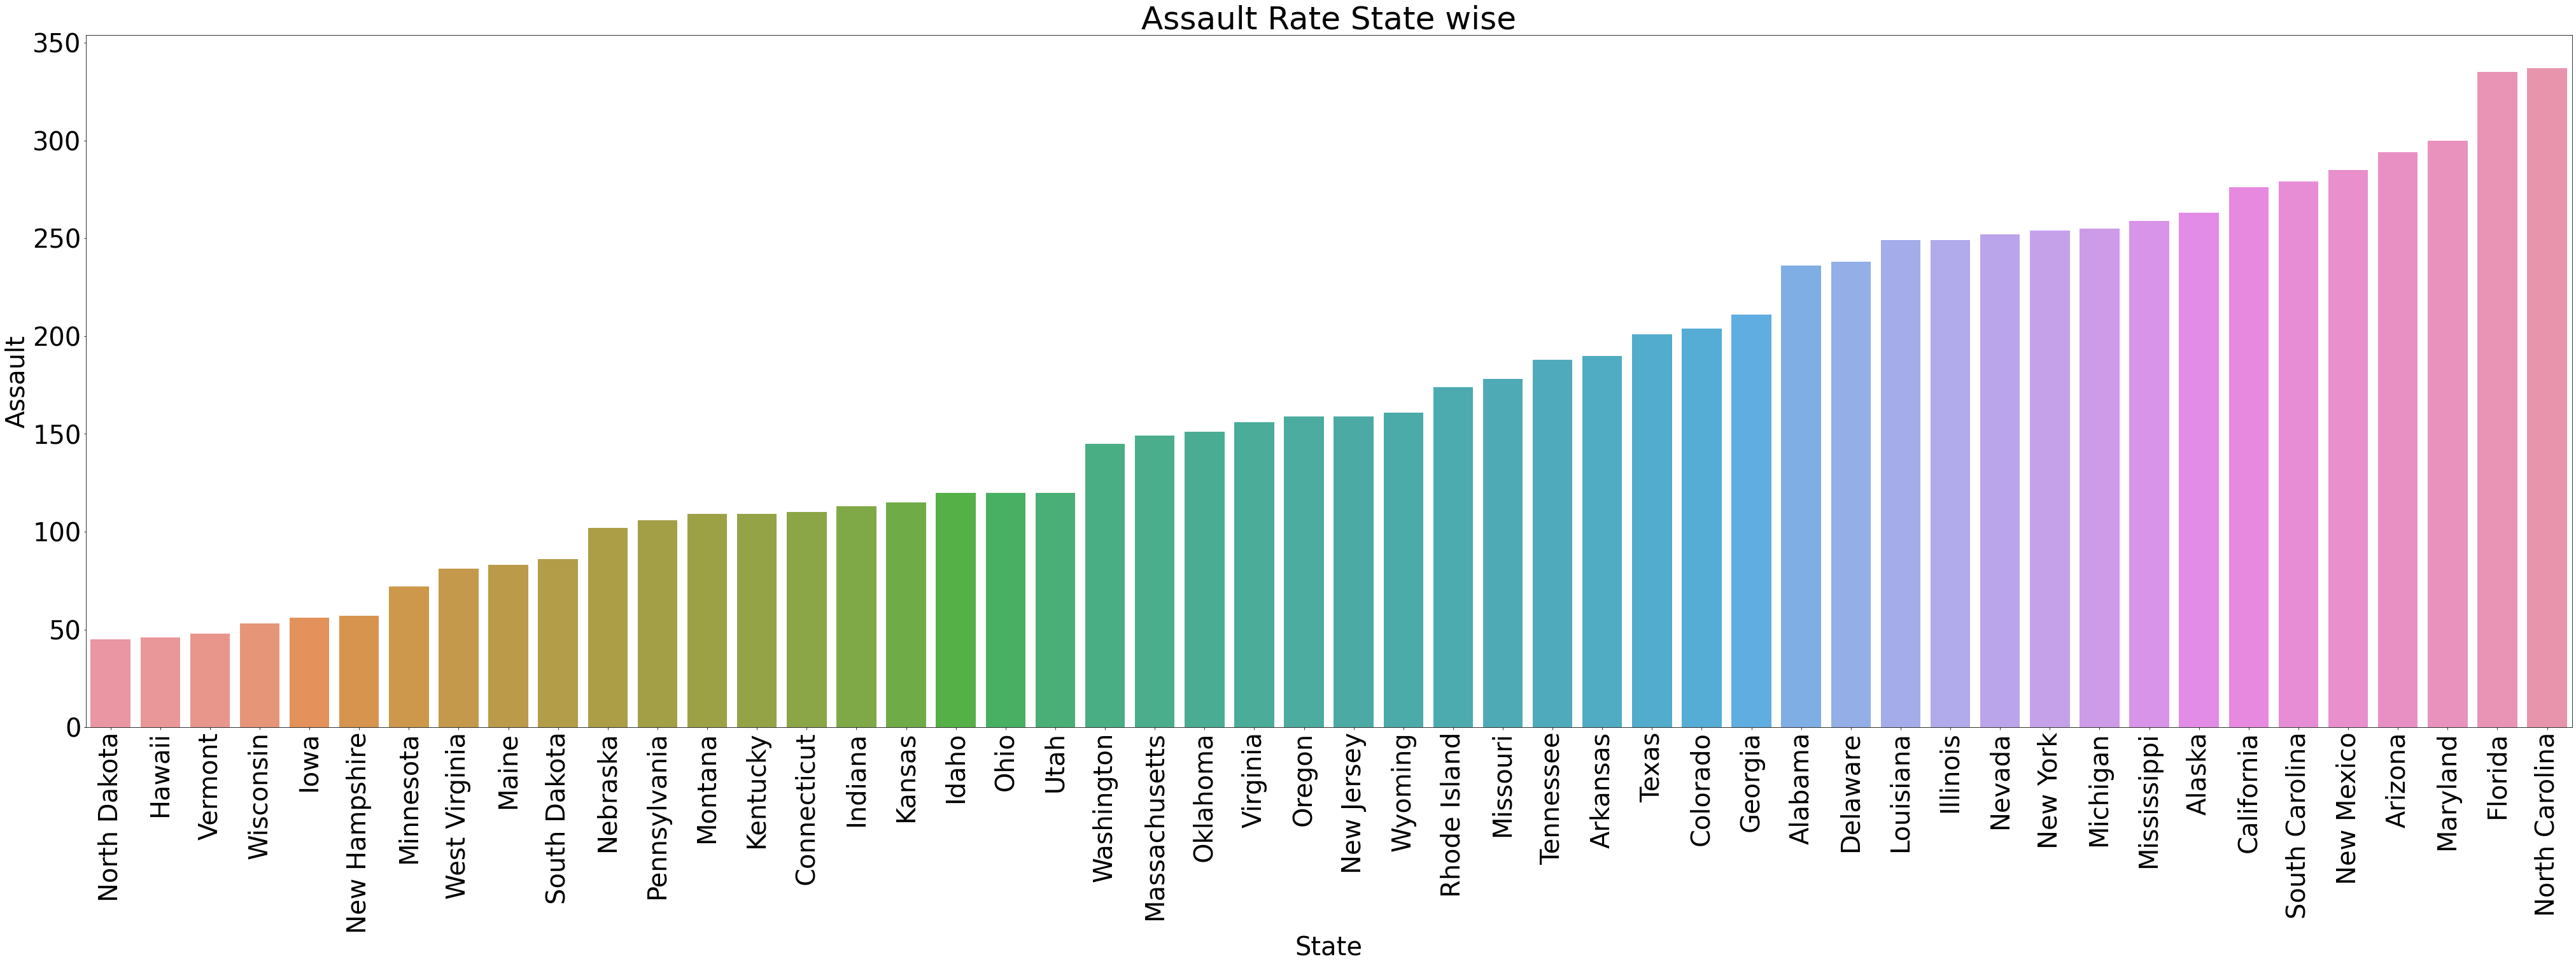

In [ ]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.Assault, order=df.sort_values('Assault').States)
plt.xlabel('State', size=40)
plt.ylabel('Assault', size=40)
plt.title('Assault Rate State wise', size=50)
plt.show()

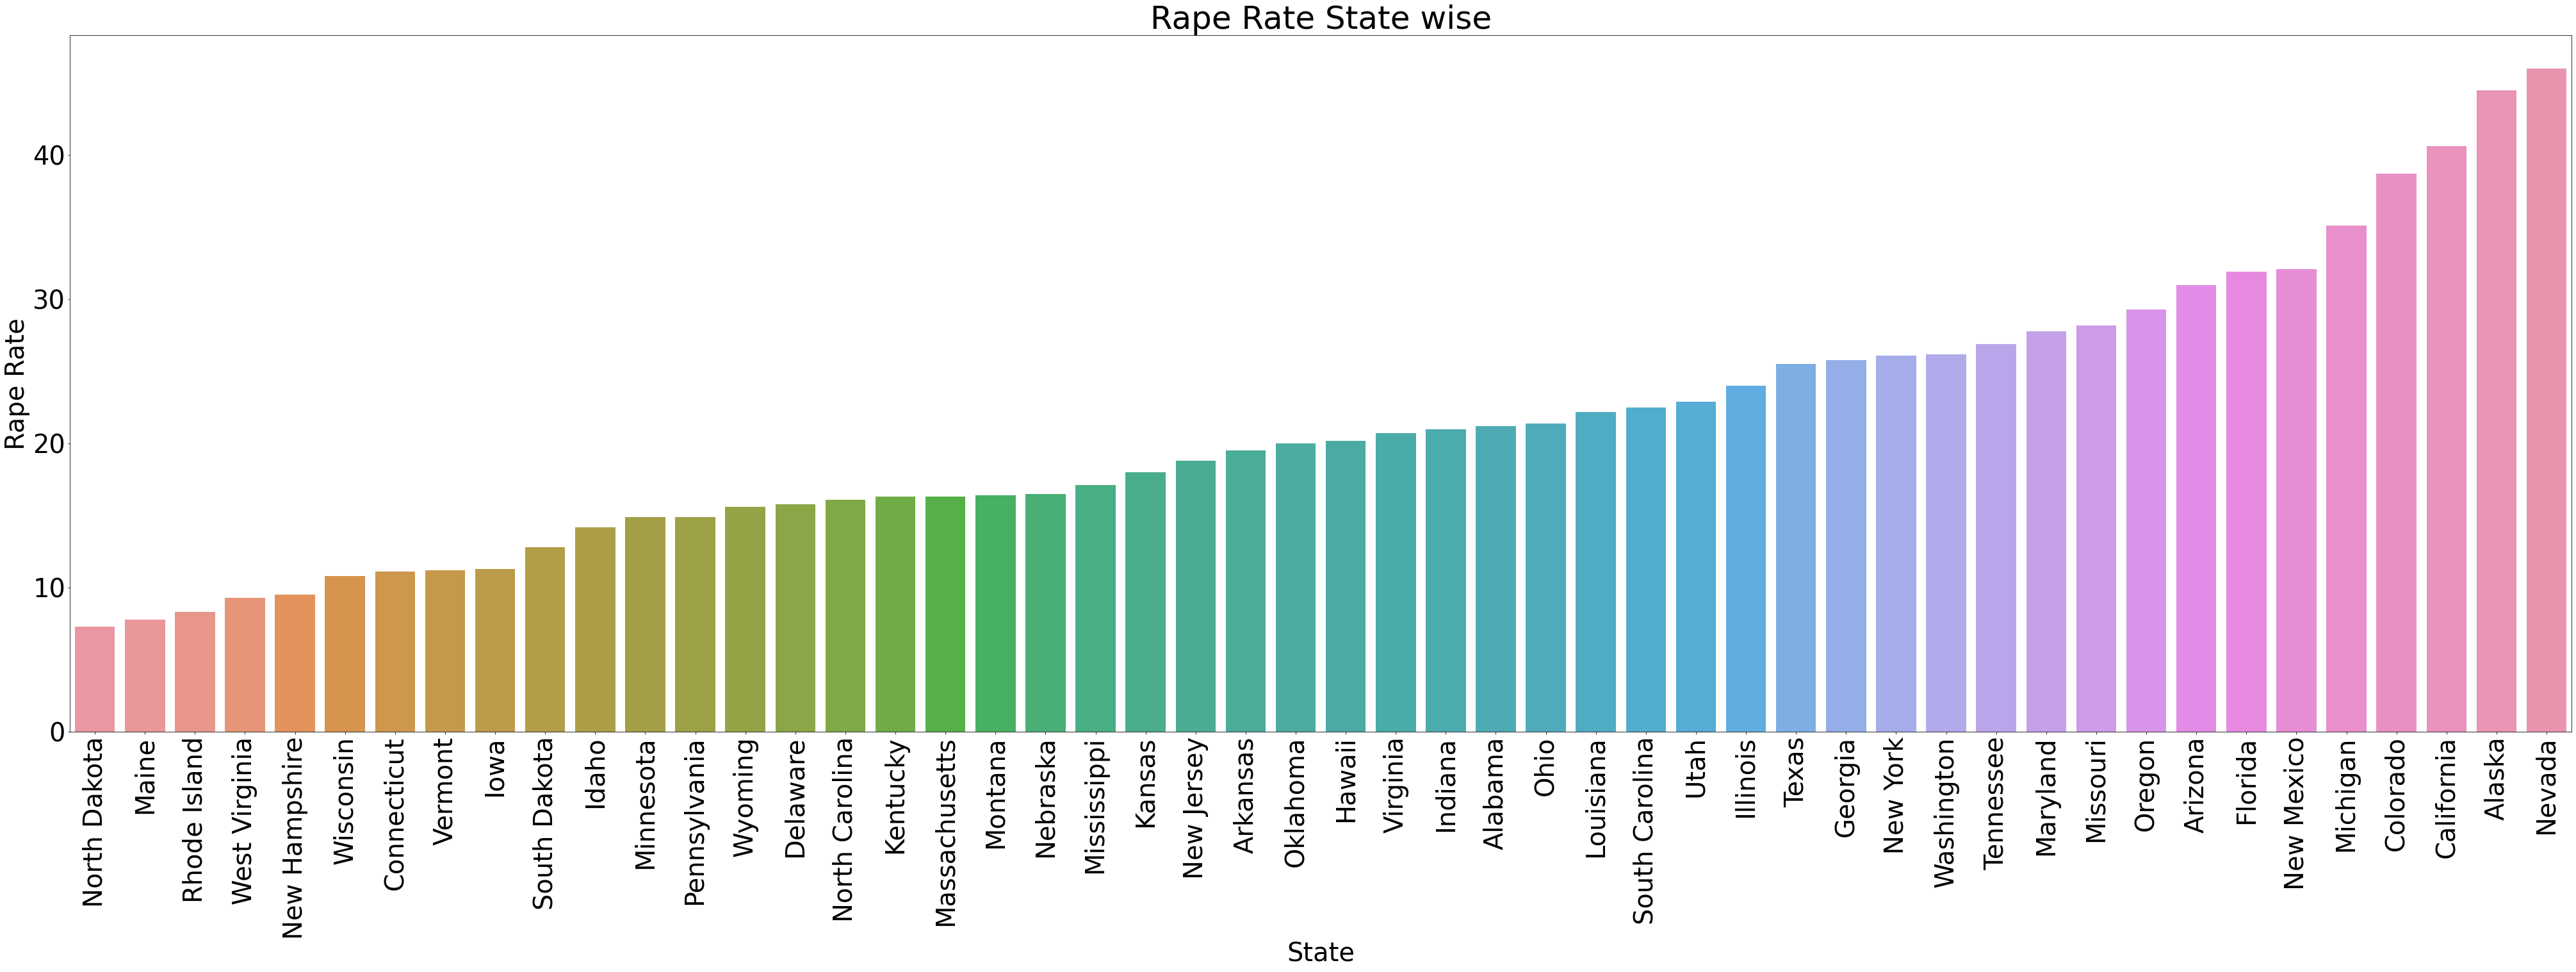

In [ ]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.Rape, order=df.sort_values('Rape').States)
plt.xlabel('State', size=40)
plt.ylabel('Rape Rate', size=40)
plt.title('Rape Rate State wise', size=50)
plt.show()

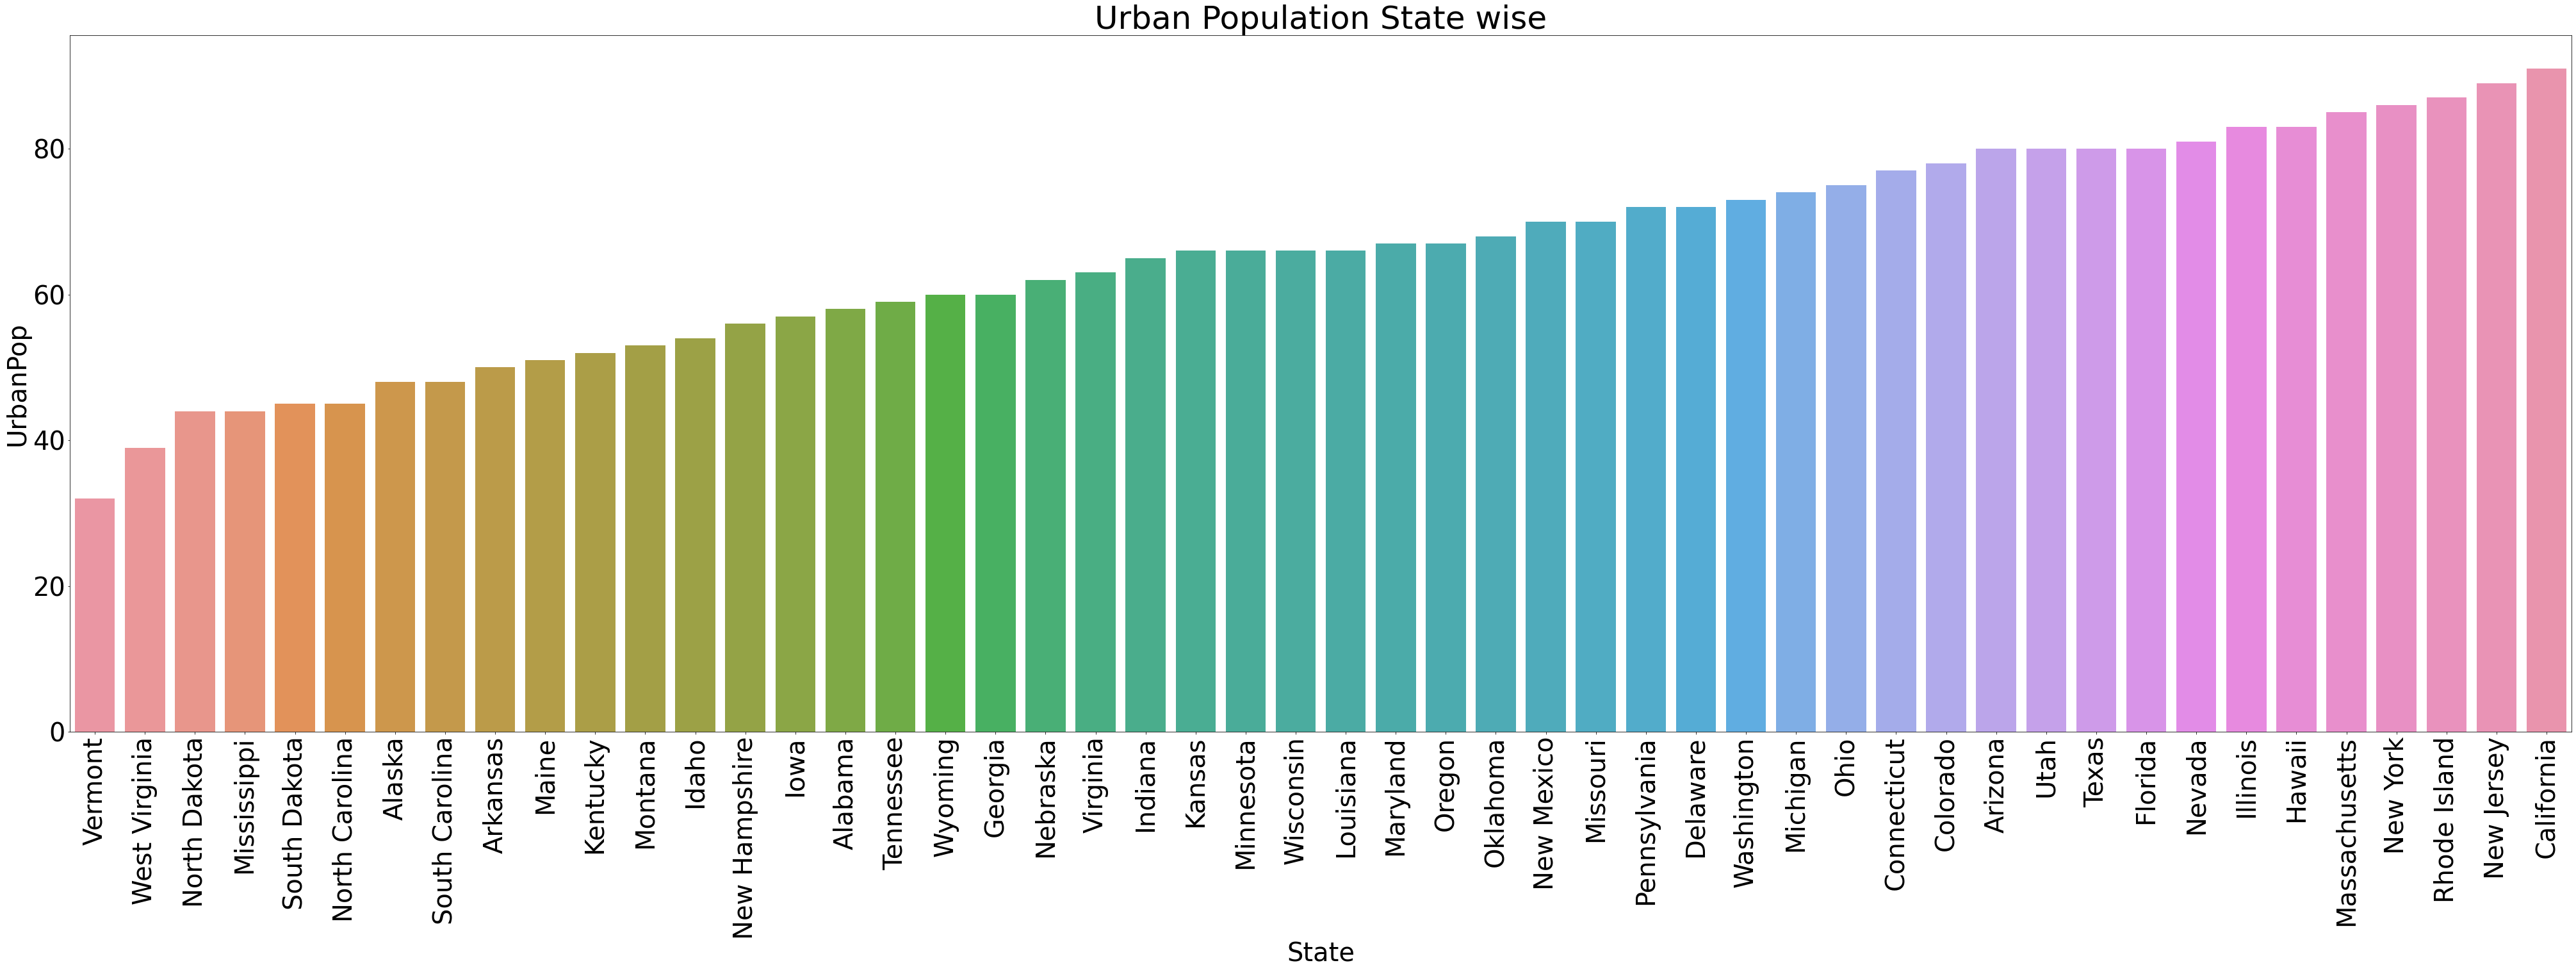

In [ ]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=df.States, y = df.UrbanPop, order=df.sort_values('UrbanPop').States)
plt.xlabel('State', size=40)
plt.ylabel('UrbanPop', size=40)
plt.title('Urban Population State wise', size=50)
plt.show()

From the plots we can imply that in North Dakota the urbna population is less, and all the murder rate, assault rate and rape rate is the lowest.

Whereas in California and Florida, the urban population is on higher side and the murder, assault and rape rate all are high.

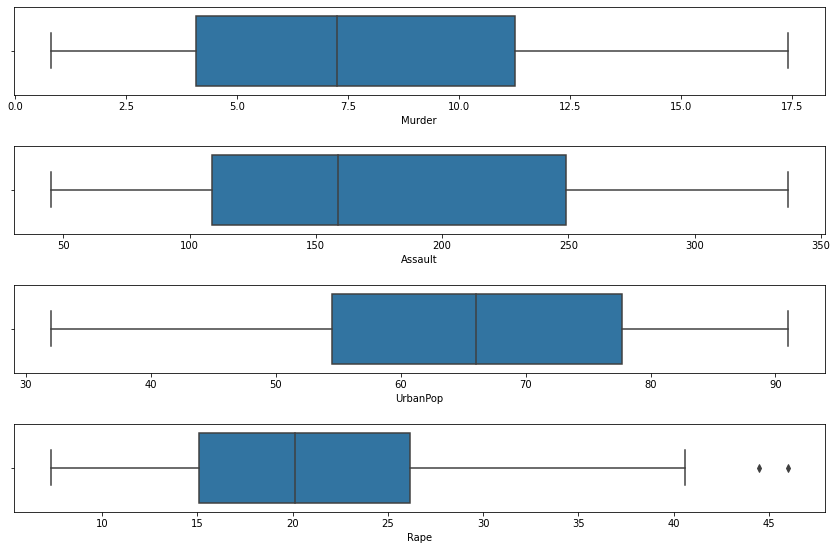

In [ ]:
#Outlier Detection
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=df,ax=axes[0])
sns.boxplot(x='Assault',data=df,ax=axes[1])
sns.boxplot(x='UrbanPop',data=df,ax=axes[2])
sns.boxplot(x='Rape',data=df,ax=axes[3])
plt.tight_layout(pad=2.0)

There are few outliers in Rape rate but we cannot remove them as they are a legitimate data in few states.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


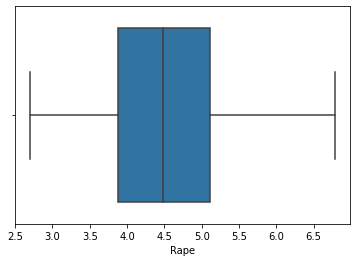

In [ ]:
#use log transformation to check
import numpy as np
sns.boxplot(np.sqrt(df.Rape))

In [ ]:
#Correaltion Matrix
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


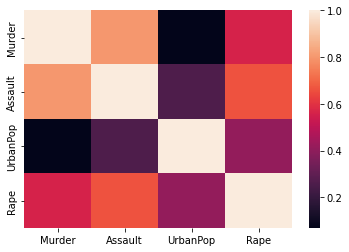

In [ ]:
sns.heatmap(df.corr())
plt.show()

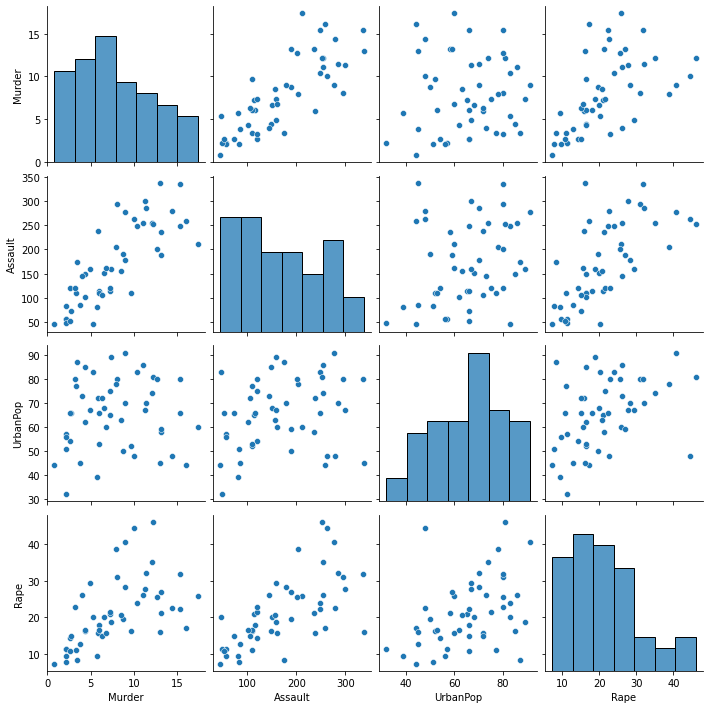

In [ ]:
#pair plot
sns.pairplot(df)

In [ ]:
#Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= df.drop(['States'], axis=1)
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(50, 4)

In [ ]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(50, 4)

# **Heirrarchical Clustering**

**Single**

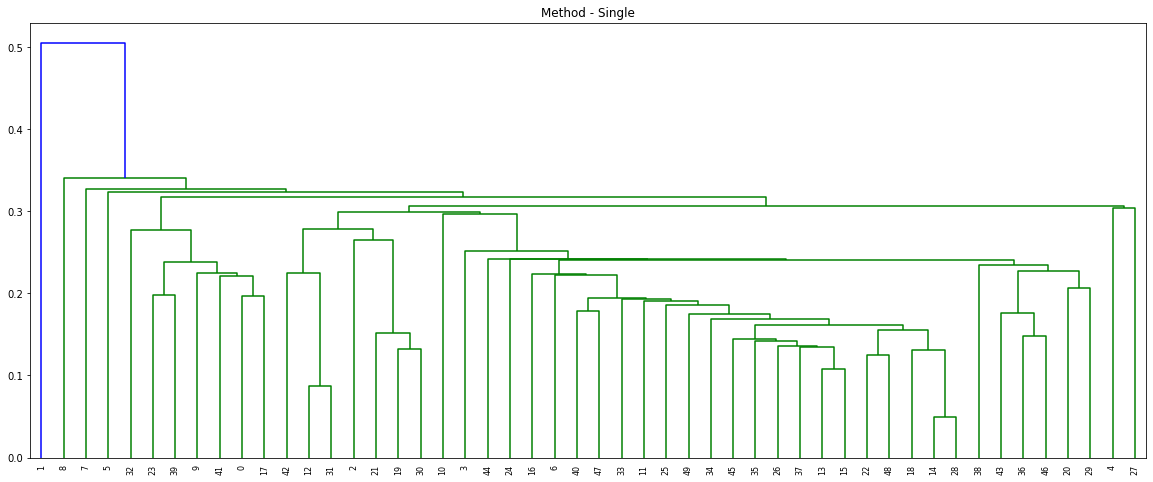

In [ ]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='single'))
plt.title("Method - Single")
plt.show()

In [ ]:
#creating clusters method - single
hc_s = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [ ]:
y_hc = hc_s.fit_predict(minmax_df)
Clusters_s = pd.DataFrame(y_hc, columns=['Cluster'])

In [ ]:
Clusters_s

In [ ]:
Clusters_s.value_counts()

Cluster
0          48
1           1
2           1
dtype: int64

In [ ]:
df['h_clusterid'] = Clusters_s

In [ ]:
df

In [ ]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.583333,165.416667,65.604167,20.525
1,1,10.000000,263.000000,48.000000,44.500
2,2,15.400000,335.000000,80.000000,31.900


Here we can say that states in cluster index 0 are a safer than other 2 clusters, but as we can check in dendrogram in cluster 1 and cluster 2 only 2 states are available which does not give us a valid clarification.

**Average**

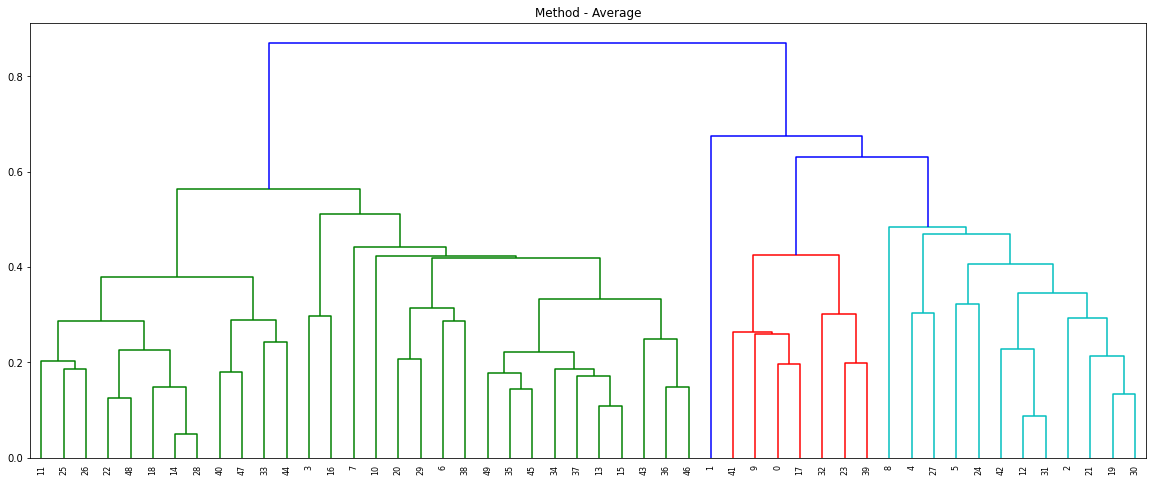

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='average'))
plt.title("Method - Average")
plt.show()

In [ ]:
#create clusters using method - average
hc_a = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'average')

In [ ]:
y_hc = hc_a.fit_predict(minmax_df)
Clusters_a = pd.DataFrame(y_hc, columns=['Clusters'])

In [ ]:
Clusters_a

In [ ]:
df['h_clusterid'] = Clusters_a
Clusters_a.value_counts()

Clusters
1           30
0           20
dtype: int64

In [ ]:
df

In [ ]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165,255.250000,68.400000,29.165000
1,1,4.870,114.433333,63.633333,15.943333


- Here we can conclude cluster index 1 states are more safer than cluster index 0 states. 

- Cluster index 1 has comparitively less urban population than cluster index 0.

- Cluster index 1 has 30 states and cluster index 0 has 20 states.

- So we can say the urban population is affecting the rate of crimes. More the urban population more the crime.  

**Complete**

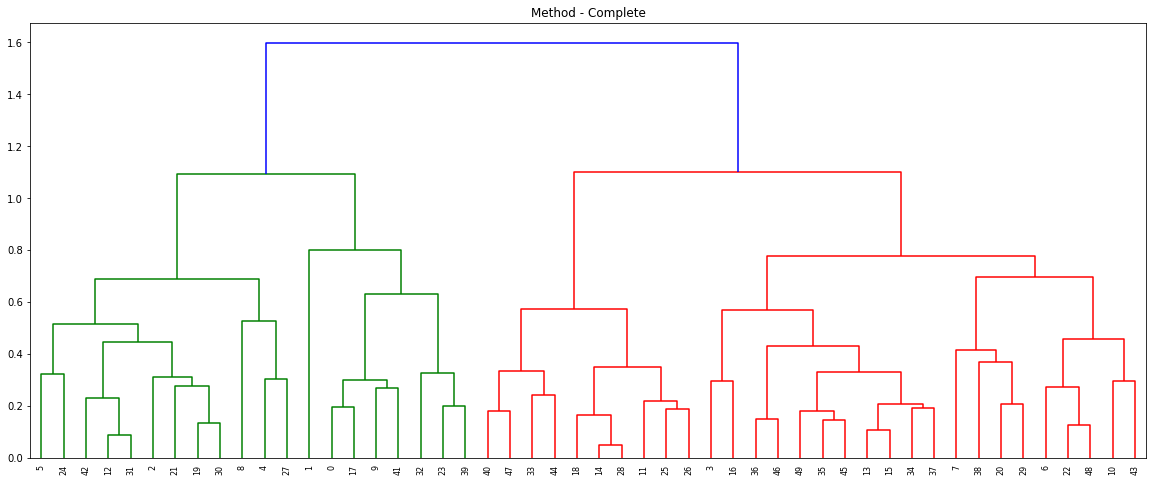

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'))
plt.title("Method - Complete")
plt.show()

In [ ]:
#create clusters using method - complete
hc_c = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'complete')

In [ ]:
y_hc = hc_c.fit_predict(minmax_df)
Clusters_c = pd.DataFrame(y_hc, columns=['Clusters'])

In [ ]:
Clusters_c

In [ ]:
df['h_clusterid'] = Clusters_c
Clusters_c.value_counts()

Clusters
0           30
1           20
dtype: int64

In [ ]:
df

In [ ]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


Results are almost similar to Average method.

# **K-Means CLustering**

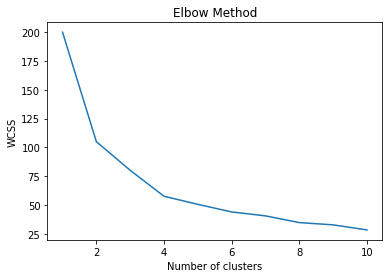

In [ ]:
#How to find optimum number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To choose any k value between 4-8 would be suitable. But we will go with the lowest i.e 4. 

In [ ]:
from pandas.core.common import random_state
clusters_new = KMeans(4, random_state=32)
clusters_new.fit(std_df)

KMeans(n_clusters=4, random_state=32)

In [ ]:
clusters_new.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [ ]:
df1['h_clusterid'] = clusters_new.labels_

In [ ]:
df1


In [ ]:
df1.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.656250,138.875000,73.875000,18.781250


- Here we can conclude that states in cluster 1 are safer than other 3 clusters.

- Also the urban population in cluster 1 states is less compared to other clusters.

- Here also we can conclude that the urban population is affecting the rate of crime. As we can check in cluster 1, the urban population is the lowest and also the crimes are lowest in comparison to other 3 cluster of states.

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [318]:
df_d=pd.read_csv('/content/crime_data.csv')

In [319]:
dbscan = DBSCAN(eps = 1.25, min_samples=3)
dbscan.fit(std_df)

DBSCAN(eps=1.25, min_samples=3)

In [320]:
#Noisy points are given by the label -1
dbscan.labels_

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [321]:
cl = pd.DataFrame(dbscan.labels_, columns=['clusters'])

In [ ]:
cl


In [323]:
df_d=pd.concat([df_d,cl], axis=1)
df_d.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [324]:
df_d['clusters'].value_counts()

 1    39
 0     7
-1     4
Name: clusters, dtype: int64

In [325]:
#clusters by DBSCAN
df_d.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.650000,281.500000,75.000000,40.750000
1,0,14.671429,251.285714,54.285714,21.685714
2,1,6.156410,144.948718,66.589744,19.148718


From DBSCAN we can check for outliers. And after trial and errors on min-samples and eps value, we chose eps = 1.25 and min_samples = 3.

- We got 4 states in outliers.

- And the clusters 0 & 1 each having 7 & 39 states respectively.

- We can conlcude from here that cluster 1 states are safer than cluster 0.
